# **Decision Trees**
<img style="float: right;" width="400" height="400" src = "imgs/DT0.png">
Decision Trees are a popular and versatile machine learning algorithm used for both classification and regression tasks. A Decision Tree is a tree-like model where each internal node represents a decision based on the value of a particular feature, and each leaf node represents the outcome of a decision or a target variable.

### **Algorithms**
> 1. ID3
> 2. C4.5
> 3. C5.0
> 4. CART (implemented in sklearn for decision trees)

### **Working of CART Algorithm**  
> 1. The algorithm selects the best feature to split the dataset based on a certain criterion (e.g., Gini impurity for classification, mean squared error for regression).
> 2. It recursively divides the dataset into subsets based on the chosen feature.
> 3. The process continues until a stopping condition is met (e.g., a predefined depth is reached, or a node contains a minimum number of data points).
> 4. Each leaf node corresponds to a class label in classification or a predicted value in regression.

### **Key Concept**  
<img style="float: right;" width="500" height="400" src = "imgs/DT1.PNG">

1. **Information Gain**  
In the context of decision tree algorithms, the **Information Gain** is a metric **used to determine the effectiveness of a feature in partitioning the data**. The Information Gain is calculated by measuring the reduction in entropy (or Gini impurity) after a dataset is split based on a particular feature. The formula for Information Gain is often expressed as the weighted sum of entropies of child nodes.

> The weighted entropy is beneficial in situations where the classes in the child nodes are not balanced, meaning one child node might have more instances than the other. This is particularly important in datasets where the class distribution is skewed.  
> The formula for Information Gain with weighted entropy is as follows:

$$\text{Information Gain} = \text{Entropy(parent)} - \sum_{i=1}^{p} \frac{|D_i|}{|D|} \cdot \text{Entropy(child}_i) $$

<img style="float: right;" width="500" height="400" src = "imgs/DT3.PNG">

> Here:
> - $p$ is the number of child nodes.
> - $|D_i|$ is the number of instances in the \(i\)-th child node.
> - $|D|$ is the total number of instances in the parent node.

2. **Entropy (Classification Trees)** `AKA Shannon Entropy`  
Entropy is a measure used for splitting nodes in Decision Trees, particularly in information theory. It is commonly applied in classification tasks. Entropy is a measure of node impurity. The lower the entropy, the more homogeneous the node is in terms of class labels.
The formula for entropy $H(t)$ for a given node is defined as:

$$ H(t) = - \sum_{i=1}^{C} p(y_i) \log_2(p(y_i)) $$

> Here:
> - $t$ is the current node.
> - $C$ is the number of classes.
> - $p(y_i)$ is the probability of class in the $t$ node.
> The entropy ranges from 0 to 1

<img style="float: right;" width="500" height="400" src = "imgs/DT2.PNG">

3. **Gini Impurity (Classification Trees)**
For a given node $t$, the Gini impurity $G(t)$ is calculated as:

$$ G(t) = 1 - \sum_{i=1}^{C} p(y_i)^2 $$

> where $C$ is the number of classes and $p(y_i)$ is the probability of class in the $t$ node. The lower the Gini impurity, the more homogeneous the node is in terms of class labels.

4. **Mean Squared Error (Regression Trees)**  
For regression tasks, the mean squared error (MSE) is commonly used as the criterion for splitting nodes. Given a node $t$ with $|D_i|$ data points and their target values $y_i$, the MSE $MSE(t)$ is calculated as:

$$ MSE(t) = \frac{1}{|D_i|} \sum_{i \in t} (y_i - \bar{y}_t)^2 $$

> where $\bar{y}_t$ is the mean target value in node $t$. The idea is to minimize the variance of the target values within each node.

> Similar to classification trees, when constructing a regression tree, the algorithm evaluates the MSE for each feature and its potential split points and selects the feature and split point that result in the lowest overall MSE across the child nodes.


### **Advantages**  
> 1. Requires very little data preparation - No need to rescale numerical columns. For categorical columns apply LabelEncoding
> 2. Very fast during prediction time
> 3. Interpretability
> 4. Feature Importance
> 5. Non Linearity
> 6. Handle Missing Values
> 7. Handle Multi-class Classification Problem

### **Disadvantages**  
> 1. Overfitting
> 2. Instable
> 3. Sensitive to Outliers
> 4. Sensitive to Data Imbalance - Biased towards class that dominates
> 5. Very high training time. It is worse if there are numerical features in input data.
> 6. Predictions are piecewise constant approximation

## **Decision Tree on Iris Data - Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = pd.read_csv('Iris.csv')

print("Shape:", iris.shape)

print("Columns:", iris.columns)

iris.head()

Shape: (150, 5)
Columns: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

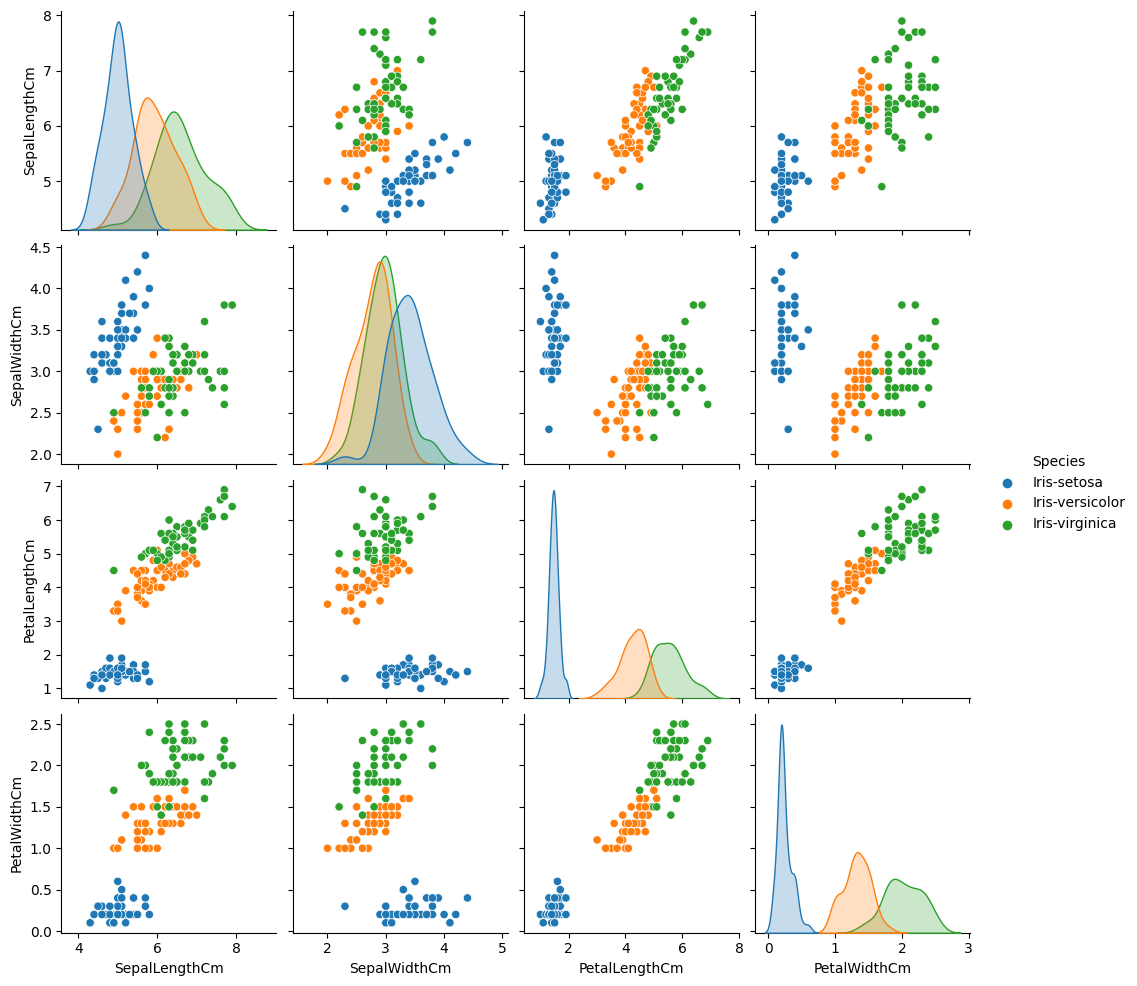

In [4]:
sns.pairplot(iris, hue = 'Species')

## **Identifying Input and Output**

In [4]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

## **Test Train Split**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Training**

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred))

0.8947368421052632


## **Visualizing the Model**

In [7]:
classifier.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

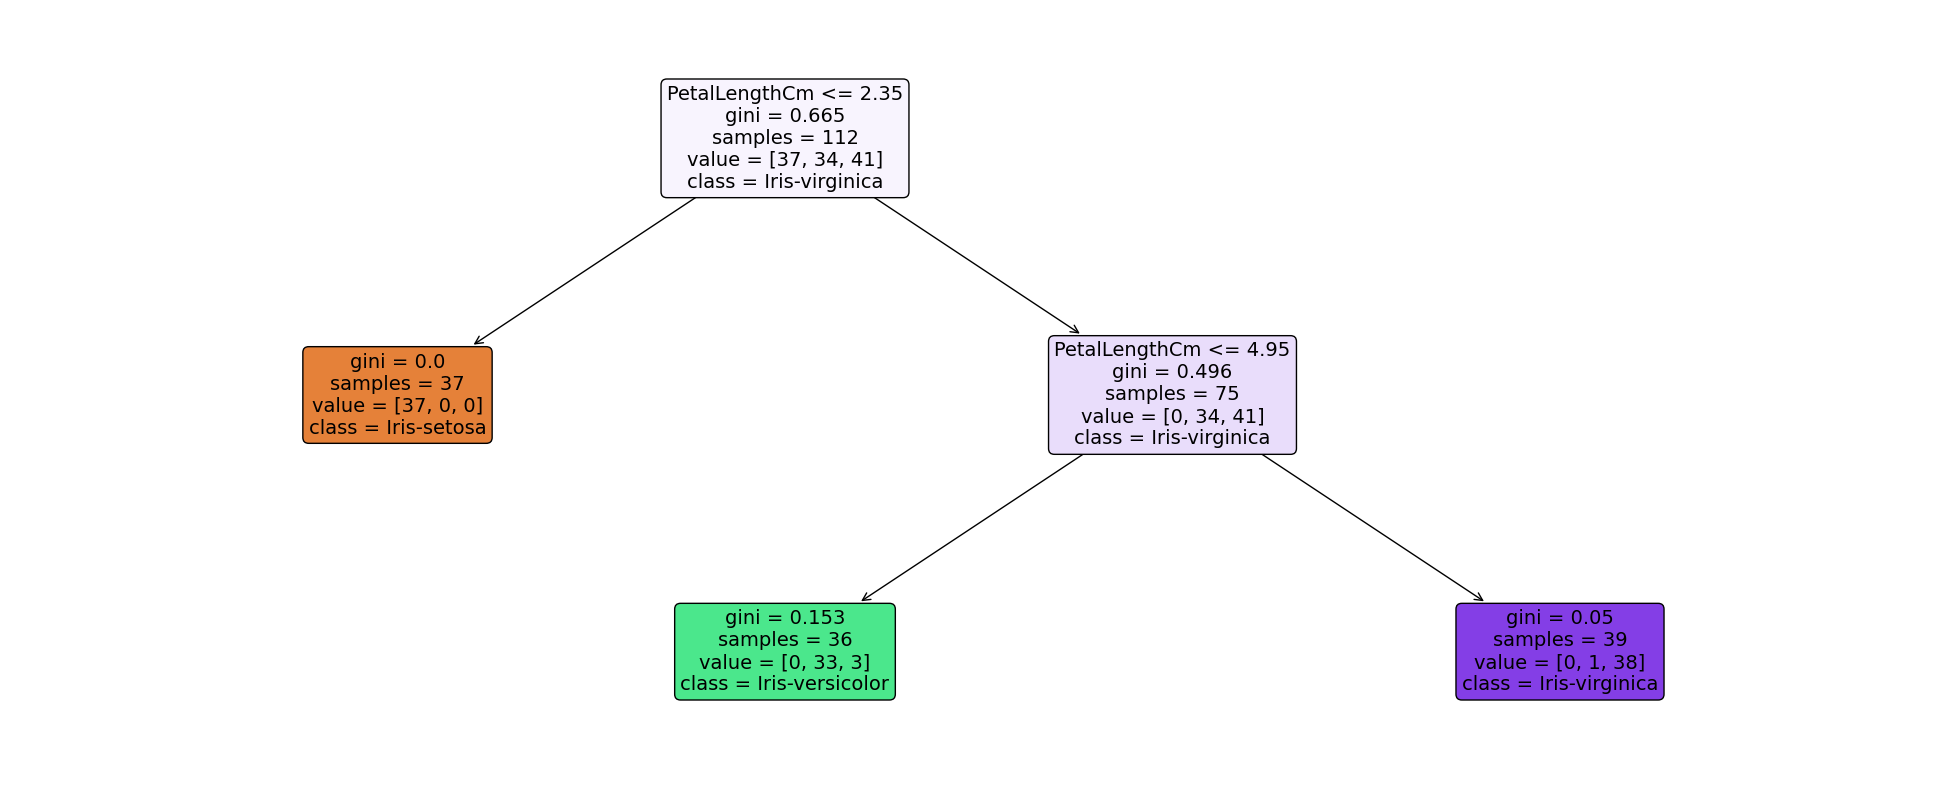

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, 
              feature_names = X_train.columns, 
              class_names = classifier.classes_, 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

plt.show()

## **Feature Importance**

In [9]:
classifier.feature_importances_

array([0., 0., 1., 0.])

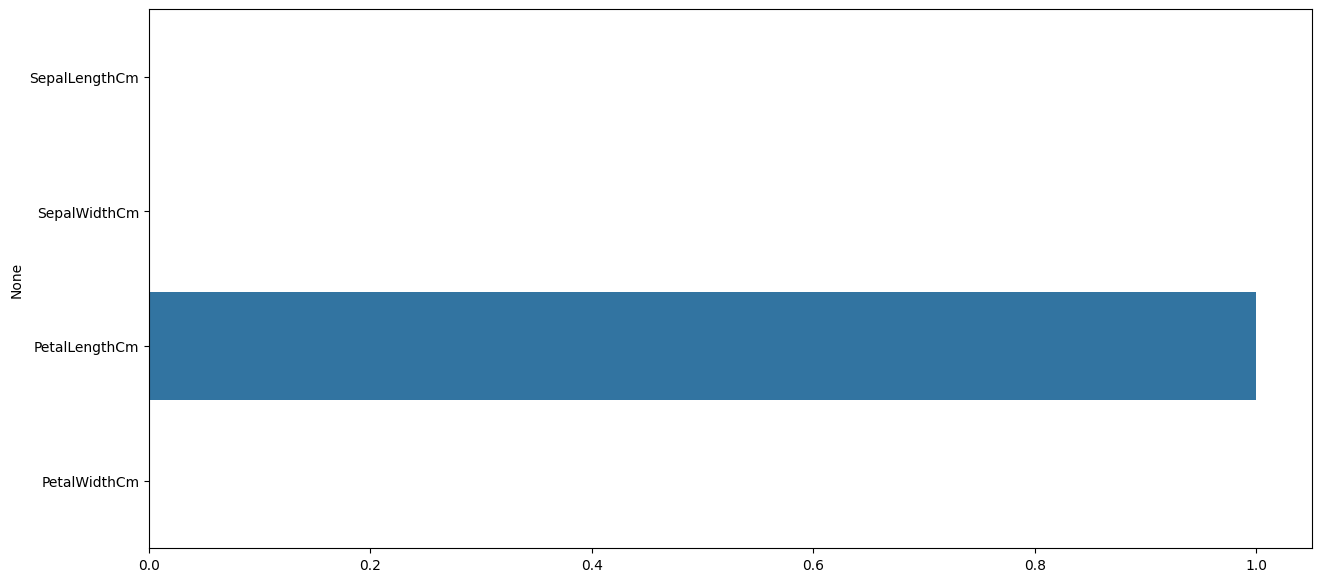

In [10]:
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y=X_train.columns)

plt.show()

## **Decision Tree on Wine Data**

In [11]:
# Load the data
df = pd.read_csv('wine_data.csv')

print("Shape:", df.shape)

print("Columns:", df.columns)

df.head()

Shape: (1599, 12)
Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [13]:
df['quality'] = df['quality'].map(lambda val: 'Good' if val>=6 else 'Bad')

In [14]:
df['quality'].value_counts()

quality
Good    855
Bad     744
Name: count, dtype: int64

In [15]:
# Identify input and output
y = df['quality']

X = df.drop('quality', axis=1)

In [16]:
# Split data into train and tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Training a model and evaluation of learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred))

0.7


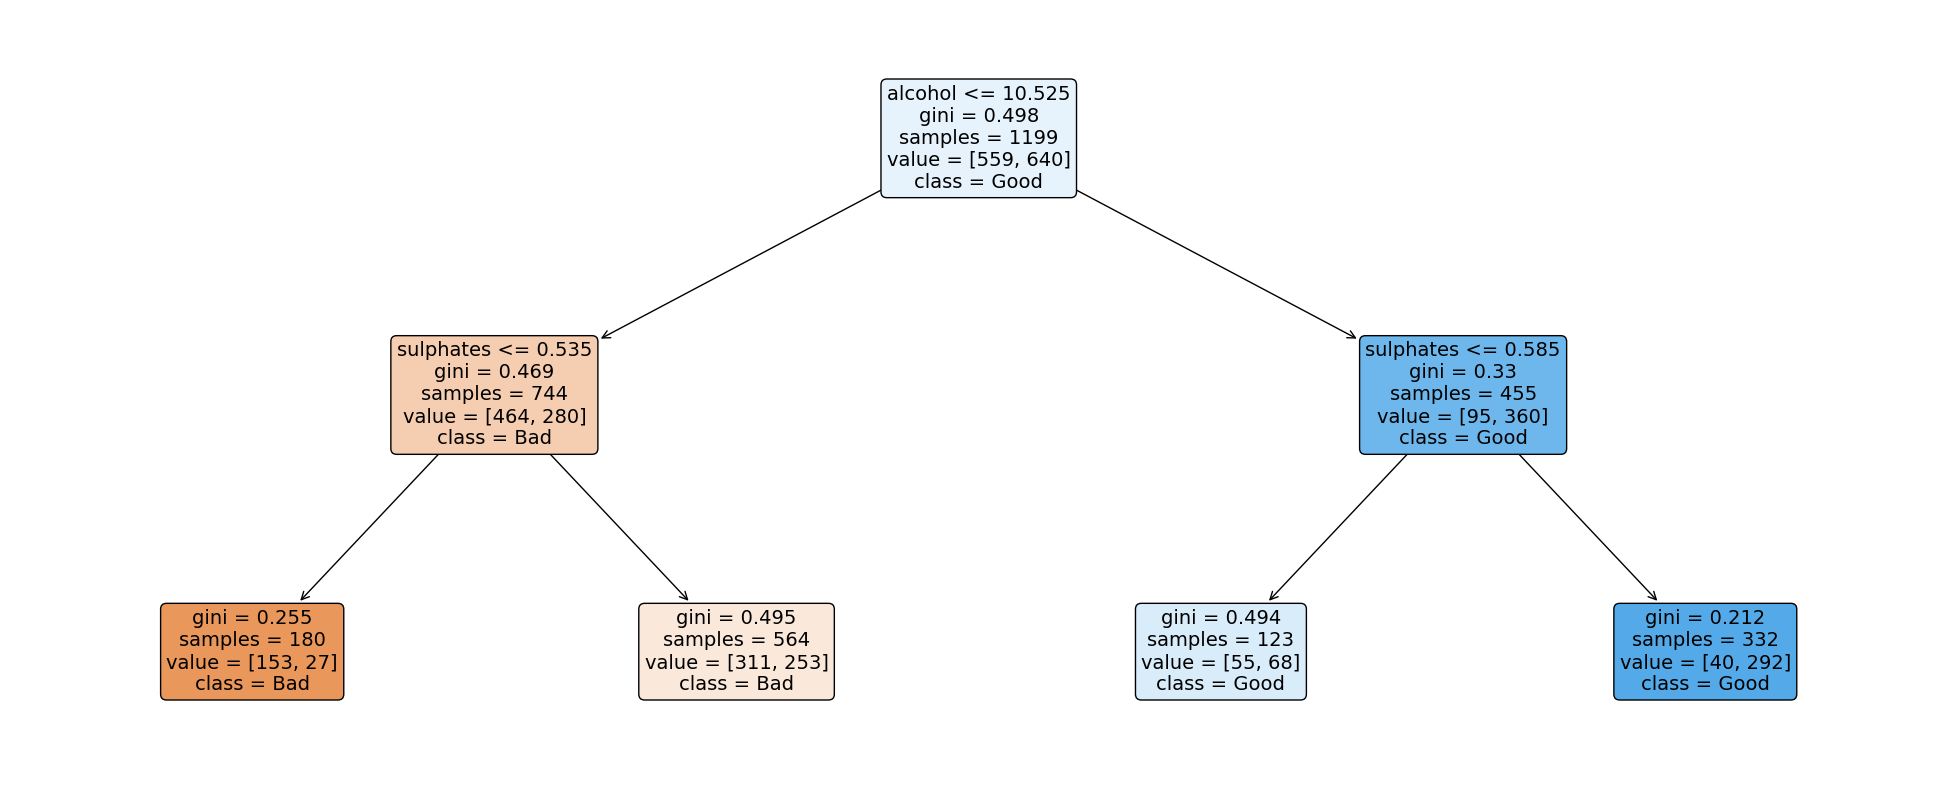

In [19]:
# Visuallization of DT Model
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, 
              feature_names = X_train.columns, 
              class_names = classifier.classes_, 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

plt.show()

In [20]:
# Feature Importance
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30912238,
       0.69087762])

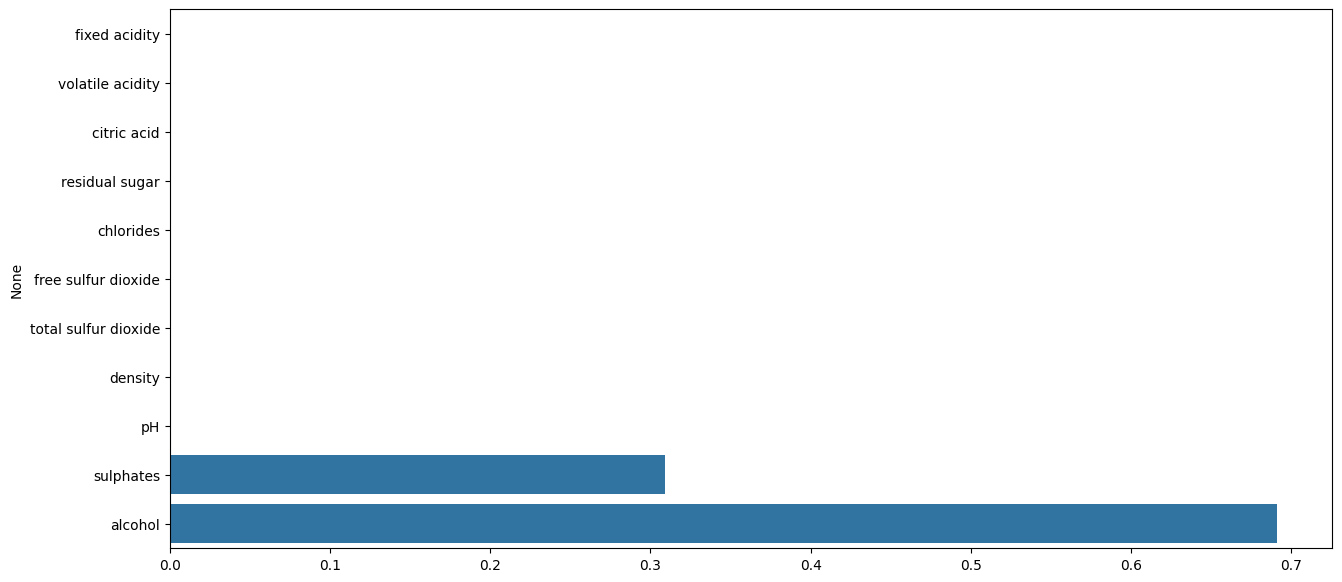

In [21]:
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y=X_train.columns)

plt.show()